In [1]:
import tensorflow as tf

# Loading - "Mnist Data Set"
## Contatining Training samples = 60,000 , Testing Samples =10 000
### TensorFlow already contain MNIST data set can be loaded using Keras

In [2]:
mnist = tf.keras.datasets.mnist

### After loading the MNIST data, Divide into train and Test datasets

In [3]:
##unpacking the dataset into train and test datasets
(x_train, y_train),(x_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 74s 6us/step


In [4]:
x_train.shape

(60000, 28, 28)

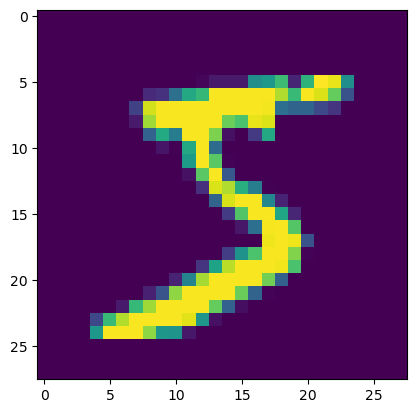

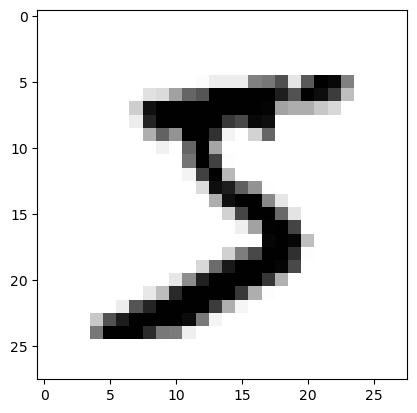

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap = plt.cm.binary)

### Checking the values of each pixel
### Before Normalization

In [13]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### As images are Gray level (1 channel ==> 0 to 255), not Colored (RGB)
## Normalizing the data | Pre-Processing Step

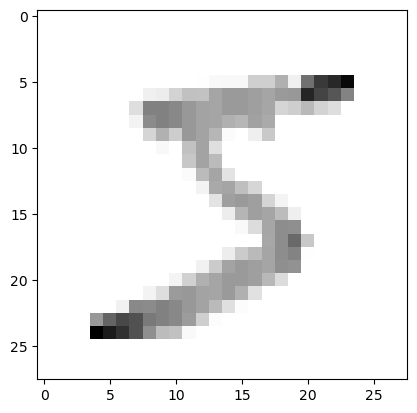

In [14]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap=plt.cm.binary)

### After Normalization

In [17]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [18]:
print(y_train[0])

5


## Resizing image to make it suitable for apply Convolution operation

In [22]:
import numpy as np
IMG_SIZE = 28
### incerasing one operation for kernal operation
x_trainr=np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
### increasing one dimension for kernal operation
x_testr=np.array(x_test).reshape(-1, IMG_SIZE,IMG_SIZE, 1)
print("Training Samples dimension", x_trainr.shape)
print("Testing Samples dimension", x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


## Creating a Deep Neural Network
### Training on 60,000 samples of MNIST handwritten dataset

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [25]:
### Creating a neural network now
model = Sequential()

#### First Convolution Layer
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))##activation function
model.add(MaxPooling2D(pool_size=(2,2)))#MaxPooling

#### 2nd Convolution Layer
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))##activation function
model.add(MaxPooling2D(pool_size=(2,2)))#MaxPooling

#### 3rd Convolution Layer
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))##activation function
model.add(MaxPooling2D(pool_size=(2,2)))#MaxPooling

### Fully Connected Layer #1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

### Fully connected Layer #2
model.add(Dense(32))
model.add(Activation("relu"))

### Last Fully Connected Layer. output must be equal to number of classes, 10 (0-9)
model.add(Dense(10)) ## this last dense layer must be equal to 10
model.add(Activation('softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [28]:
print("Total Training Samples = ", len(x_trainr))

Total Training Samples =  60000


In [30]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])

In [31]:
model.fit(x_trainr, y_train, epochs=5, validation_split=0.3)

Epoch 1/5


1313/1313 [==============================] - 45s 31ms/step - loss: 0.3346 - accuracy: 0.8954 - val_loss: 0.1150 - val_accuracy: 0.9655
Epoch 2/5
1313/1313 [==============================] - 42s 32ms/step - loss: 0.1014 - accuracy: 0.9693 - val_loss: 0.1078 - val_accuracy: 0.9663
Epoch 3/5
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0729 - accuracy: 0.9776 - val_loss: 0.0757 - val_accuracy: 0.9773
Epoch 4/5
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0577 - accuracy: 0.9818 - val_loss: 0.0830 - val_accuracy: 0.9749
Epoch 5/5
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0454 - accuracy: 0.9856 - val_loss: 0.0605 - val_accuracy: 0.9833


In [33]:
### Evaluating on testing dataa set MNIT
test_loss, test_acc= model.evaluate(x_testr, y_test)
print("Test Loss on 10, 000 test samples", test_loss)
print("Validation Accuracy on 10,000 test samples", test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0587 - accuracy: 0.9846
Test Loss on 10, 000 test samples 0.05874008312821388
Validation Accuracy on 10,000 test samples 0.9846000075340271


In [35]:
predictions = model.predict([x_testr])

313/313 [==============================] - 4s 11ms/step


In [36]:
print(predictions)

[[1.6405522e-06 4.7167478e-06 1.4955031e-06 ... 9.9998748e-01
  4.9224833e-09 1.5832247e-06]
 [6.4869353e-04 8.3344376e-06 9.9932086e-01 ... 1.9896386e-05
  1.3185136e-06 8.3153236e-07]
 [9.4814101e-10 9.9999988e-01 1.6899668e-07 ... 4.7653657e-08
  6.4227055e-09 4.8715666e-08]
 ...
 [1.6609251e-07 7.5068982e-07 7.5868323e-10 ... 3.8964887e-07
  2.7956758e-06 1.6442342e-06]
 [7.5499440e-04 2.5168734e-09 2.4704896e-10 ... 9.6525277e-08
  1.0397154e-03 7.0070477e-05]
 [4.0581383e-04 8.1320772e-09 8.8514474e-07 ... 2.1769470e-07
  4.4805354e-05 3.2462642e-06]]


In [37]:
print(np.argmax(predictions[0]))

7


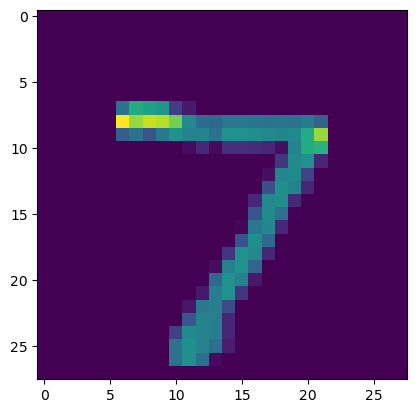

In [38]:
###check that is our answer is true or not
plt.imshow(x_test[0])

In [39]:
print(np.argmax(predictions[128]))

8


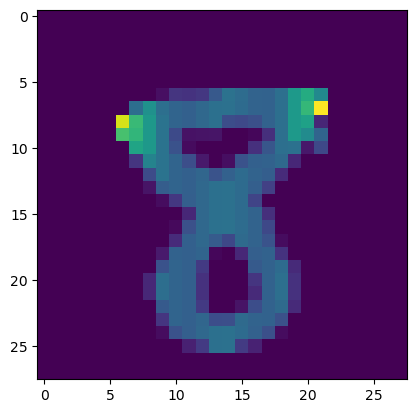

In [40]:
plt.imshow(x_test[128])

In [148]:
import cv2

In [149]:
img = cv2.imread('Image_01.png')

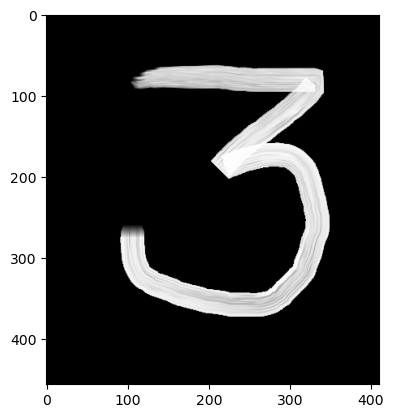

In [150]:
plt.imshow(img)

In [151]:
img.shape

(456, 411, 3)

In [152]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [153]:
gray.shape

(456, 411)

In [154]:
resized = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)

In [155]:
resized.shape

(28, 28)

In [156]:
newimg = tf.keras.utils.normalize (resized, axis=1) ## 0 to 1 scaling

In [157]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [158]:
newimg.shape

(1, 28, 28, 1)

In [159]:
predictions = model.predict(newimg)

1/1 [==============================] - 0s 24ms/step


In [160]:
print (np.argmax(predictions))

3
